# Pyber

-----

### Analysis

- Almost 80% of Uber drivers work in urban areas, almost 20% in suburban areas, and about 3% in rural areas. This is a seemingly obvious trend, as populations in these types of areas represent the amount of drivers in each area.
- Suburban and rural fares combine to make up only 38% of total fares across Uber drivers. 62% of their money made from driver fares come from urban areas. Being that rural areas have lower populations, and therefore less drivers, the average fare in higher.
- Conversely, urban areas make up the highest amount of rides and the lowest fare. This also relates to higher population and population density in these places. Since there are more people, there are a higher amount of Uber drivers in urban areas.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [15]:
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

In [22]:
merged = pd.merge(city_data ,ride_data ,on="city")
merged.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


## Bubble Plot of Ride Sharing Data

-----

In [28]:
urban = merged[(merged["type"] == "Urban")]
suburban = merged[(merged["type"] == "Suburban")]
rural = merged[(merged["type"] == "Rural")]

urban_average = urban.groupby("city")["fare"].mean()
suburban_average = suburban.groupby("city")["fare"].mean()
rural_average = rural.groupby("city")["fare"].mean()

urban_rides = urban.groupby("city")["ride_id"].count()
suburban_rides = suburban.groupby("city")["ride_id"].count()
rural_rides = rural.groupby("city")["ride_id"].count()

total = city.groupby("city")["driver_count"].sum()
total.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

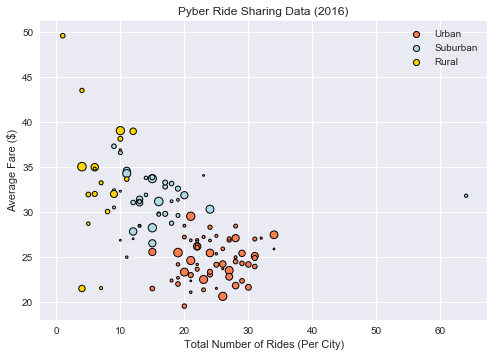

In [35]:
urban_plot = plt.scatter(urban_rides, urban_average, s=total, c='coral', linewidths=1, edgecolor='black')
suburban_plot = plt.scatter(suburban_rides, suburban_average, s=total, c="lightblue", linewidths=1, edgecolor='black')
rural_plot = plt.scatter(rural_rides, rural_average, s=total, c="gold", linewidths=1, edgecolor='black')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(handles=[urban_plot,suburban_plot,rural_plot], labels=['Urban','Suburban','Rural'])
sns.set
plt.show()

## Total Fares by City Type

-----

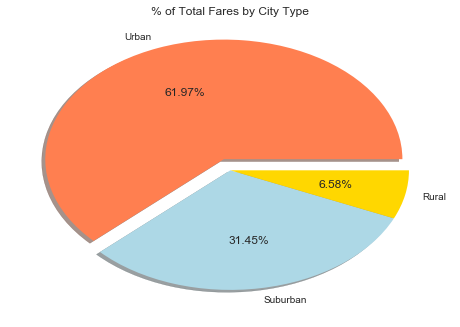

In [36]:
urban_fare = urban["fare"].sum()
suburban_fare = suburban["fare"].sum()
rural_fare = rural["fare"].sum()

total_fare = [urban_fare, suburban_fare, rural_fare]
explode = [.1,0,0]
labels = ["Urban", "Suburban", "Rural"]
colors = ["coral", "lightblue", "gold"]
plt.pie(totalfare, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, explode=explode)
plt.title("% of Total Fares by City Type")
sns.set()
plt.show()

## Total Rides by City Type

-----

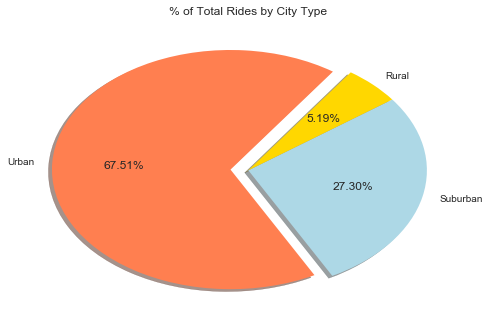

In [42]:
urban_rides = urban["ride_id"].count()
suburban_rides = suburban["ride_id"].count()
rural_rides = rural['ride_id'].count()

total_rides = [urban_rides, suburban_rides, rural_rides]
explode = [.1,0,0]

labels = ["Urban", "Suburban", "Rural"]
colors = ["coral", "lightblue", "gold"]

plt.pie(total_rides, labels=labels, colors=colors, autopct='%1.2f%%', startangle=55, explode=explode, shadow=True)
plt.title("% of Total Rides by City Type")
sns.set()
plt.show()

## Total Drivers by City Type

-----

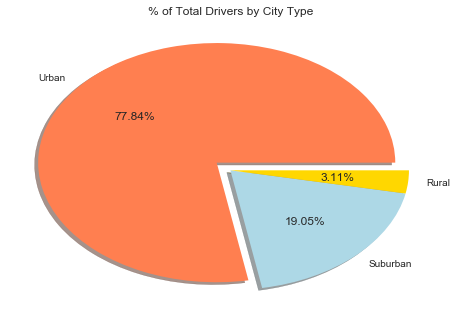

In [44]:
urban_drivers = city[(city["type"]=="Urban")]
urban_drivers = urban_drivers["driver_count"].sum()
suburban_drivers = city[(city["type"]=="Suburban")]
suburban_drivers = suburban_drivers["driver_count"].sum()
rural_drivers = city[(city["type"]=="Rural")]
rural_drivers = rural_drivers["driver_count"].sum()

total_drivers = [urban_drivers, suburban_drivers, rural_drivers]
explode = [.1,0,0]
labels = ["Urban", "Suburban", "Rural"]
colors = ["coral", "lightblue", "gold"]

plt.pie(total_drivers, labels=labels, colors=colors, autopct='%1.2f%%', explode=explode, shadow=True)
plt.title("% of Total Drivers by City Type")
sns.set()
plt.show()